# **Recorrido en Anchura**

In [9]:
from collections import deque
lista=[30,15,28,16,18,10,48]
print(lista)

cola=deque(lista)
print(cola)
print(cola.pop())
print(cola)
print(cola.popleft())
print(cola)


[30, 15, 28, 16, 18, 10, 48]
deque([30, 15, 28, 16, 18, 10, 48])
48
deque([30, 15, 28, 16, 18, 10])
30
deque([15, 28, 16, 18, 10])


In [20]:
from collections import deque

def RecorridoBFS(grafo, inicio):
  visitados=set()
  colaAuxiliar=deque()
  colaAuxiliar.append(inicio)
  visitados.add(inicio)
  camino=[] #Para alamcenar la secuencia de nodos
  while colaAuxiliar:
    nodoActual=colaAuxiliar.popleft()
    camino.append(nodoActual)
    for vecino in grafo[nodoActual]:
      if vecino not in visitados:
        colaAuxiliar.append(vecino)
        visitados.add(vecino)
  return camino

#Prueba
lag1={'A':['B', 'C'],
     'B':['D', 'E'],
     'C':['F'],
     'D':['E'],
     'E':['F'],
     'F':[]
     }

lag2 = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B', 'E', 'F'],
    'E': ['B', 'D', 'F'],
    'F': ['C', 'D', 'E']
}

print(RecorridoBFS(lag1,'F'))



['F']


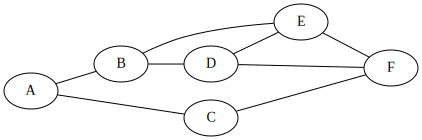

In [29]:
#grafo no dirigido
from graphviz import Graph
#Lista de adyacencia de una grafo
#Esta es una lista de adyacencia bidireccional

lag = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B', 'E', 'F'],
    'E': ['B', 'D', 'F'],
    'F': ['C', 'D', 'E']
}

grafo=Graph()
grafo.attr(rankdir='LR')
for nodo in lag.keys():
    grafo.node(nodo)
for nodo, listaVecinos in lag.items():
    for vecino in listaVecinos:
      if nodo < vecino:
        grafo.edge(nodo, vecino)
grafo


In [21]:
RecorridoBFS(lag,'F')

['F', 'C', 'D', 'E', 'A', 'B']

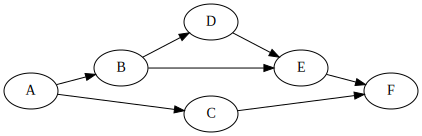

In [28]:
from graphviz import Digraph
#Esta es una lista de adyacencia dirigida
lag={'A':['B', 'C'],
     'B':['D', 'E'],
     'C':['F'],
     'D':['E'],
     'E':['F'],
     'F':[]
     }

grafo=Digraph()
grafo.attr(rankdir='LR')
for nodo in lag.keys():
    grafo.node(nodo)
for nodo, listaVecinos in lag.items():
    for vecino in listaVecinos:
      if nodo < vecino:
        grafo.edge(nodo, vecino)
grafo


Nota importante: EN el recorrrido tenga en cuenta la lista de adyacencia.

# Recorrido en profundidad

In [26]:
def recorridoDFS(grafo, inicio):
  visitados=set()
  pilaAuxiliar=[inicio] #lista  1 4 5 8 7                      7 8 5 4 1
  camino=[]
  while pilaAuxiliar:
    nodoActual=pilaAuxiliar.pop()
    if nodoActual not in visitados:
      camino.append(nodoActual)
      visitados.add(nodoActual)
      for vecino in reversed(grafo[nodoActual]):  # reversed(grafo[nodoActual]) para que la lista funcione realemnte como pila
        if vecino not in visitados:
          pilaAuxiliar.append(vecino)
  return camino

#Esta es una lista de adyacencia dirigida
lag={'A':['B','C'],
     'B':['D', 'E'],
     'C':['F'],
     'D':['E'],
     'E':['F'],
     'F':[]
     }

#Esta es una lista de adyacencia bidirigida
lag = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B', 'E', 'F'],
    'E': ['B', 'D', 'F'],
    'F': ['C', 'D', 'E']
}
recorridoDFS(lag,'F')


['F', 'C', 'A', 'B', 'D', 'E']

# Camino mas corto en una grafo no pondederado con BFS

In [30]:
def caninoCorto(grafo, inicio, meta):
  visitados=set()
  colaAuxiliar=deque([(inicio, [inicio])])
  camino=[] #Para alamcenar la secuencia de nodos
  while colaAuxiliar:
    nodoActual, camino=colaAuxiliar.popleft()
    if nodoActual==meta:
      return camino
    visitados.add(nodoActual)
    for vecino in grafo[nodoActual]:
      if vecino not in visitados:
        colaAuxiliar.append((vecino, camino+[vecino]))
        visitados.add(vecino)
  return None #CUandi no hay camino

#Prueba
lag = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': ['E'],
    'E': ['F'],
    'F': []
}

print(caninoCorto(lag,'A','D'))

['A', 'B', 'D']


# UCS

In [40]:
#Cola de prioridad
import heapq
import random


lista=[ random.randrange(100, 500) for _ in range(10)]
print("Lista original : ", lista)
heapq.heapify(lista)
print("Lista convertida a una cla de prioridad : ", lista)
print("Pop a la lista", heapq.heappop(lista))
print(lista)


Lista original :  [387, 273, 296, 392, 408, 278, 105, 218, 272, 242]
Lista convertida a una cla de prioridad :  [105, 218, 278, 272, 242, 387, 296, 392, 273, 408]
Pop a la lista 105
[218, 242, 278, 272, 408, 387, 296, 392, 273]


In [43]:
#Cola de prioridad
import heapq
import random


lista=[(10, 'A'), (115, 'B'), (8, 'C')]
print(lista)
heapq.heapify(lista)
print(lista)
heapq.heappop(lista)
print(lista)
heapq.heappush(lista, (50, 'D'))
print(lista)
heapq.heappush(lista, (1, 'D'))
print(lista)



[(10, 'A'), (115, 'B'), (8, 'C')]
[(8, 'C'), (115, 'B'), (10, 'A')]
[(10, 'A'), (115, 'B')]
[(10, 'A'), (115, 'B'), (50, 'D')]
[(1, 'D'), (10, 'A'), (50, 'D'), (115, 'B')]


In [57]:
import heapq #Cola de prioridad

def UCS(grafo, inicio, meta):
    colaPrioridad = [(0, inicio)]  # (costo acumulado, nodo)
    visitados = set()
    camino = {inicio: None}
    costos = {inicio: 0}

    while colaPrioridad:
        costoActual, nodoActual = heapq.heappop(colaPrioridad)

        if nodoActual in visitados:
            continue

        visitados.add(nodoActual)

        if nodoActual == meta:  # objetivo encontrado
            return constructorCamino(camino, inicio, meta), costoActual

        # explorar vecinos
        for vecino, costoVecino in grafo[nodoActual]:
            nuevoCosto = costoActual + costoVecino
            if vecino not in costos or nuevoCosto < costos[vecino]:
                costos[vecino] = nuevoCosto
                camino[vecino] = nodoActual
                heapq.heappush(colaPrioridad, (nuevoCosto, vecino))

    return None, float("inf")

def constructorCamino(camino, inicio, meta):
    actual = meta
    camino_definitivo = []
    while actual is not None:
        camino_definitivo.append(actual)
        actual = camino[actual]
    camino_definitivo.reverse()
    return camino_definitivo


# Ejemplo de uso
grafo = {
    'A': [('B', 1), ('C', 4)],
    'B': [('D', 6), ('E', 2)],
    'C': [('F', 3)],
    'D': [],
    'E': [('F', 1)],
    'F': []
}

camino, costo = UCS(grafo, 'A', 'F')
print("Camino más barato:", camino)
print("Costo total:", costo)

#O(ElogV), E es la cantidad de arsitas, V es la cantidad de nodos

Camino más barato: ['A', 'B', 'E', 'F']
Costo total: 4


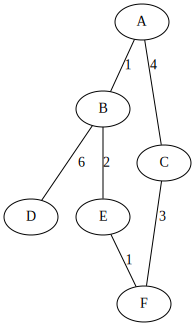

In [64]:
lag = {
    'A': {'B': 1, 'C': 4},
    'B': {'D': 6, 'E': 2},
    'C': {'F': 3},
    'D': {},
    'E': {'F': 1},
    'F': {}
}

#1.crear un objweto de la clase Graph
grafo=Graph()

#2. Agregar nodos al grafo
for nodo in lag.keys():
    grafo.node(nodo)
#3. Agregar las aristas al grafo
for nodo, listaVecinos in lag.items():
    for vecino, peso in listaVecinos.items():
      if nodo < vecino:
        grafo.edge(nodo, vecino, label=str(peso))

#4. Mostrar el grafo
grafo
#

## DLS

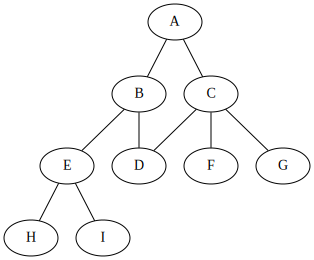

In [66]:
lag = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F', 'G', 'D'],
    'D': ['B', 'C'],
    'E': ['B', 'H', 'I'],
    'F': ['C'],
    'G': ['C'],
    'H': ['E'],
    'I': ['E']
}

#1. crear un objeto de la clase Graph
grafo=Graph()

#2. Agregar nodos al grafo
for nodo in lag.keys():
    grafo.node(nodo)

#3. Agregar las aristas
for nodo, listaVecinos in lag.items():
    for vecino in listaVecinos:
      if nodo < vecino:
        grafo.edge(nodo, vecino)

#4. Mostrar el grafo
grafo



In [83]:
lag = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F', 'G', 'D'],
    'D': ['B', 'C'],
    'E': ['B', 'H', 'I'],
    'F': ['C'],
    'G': ['C'],
    'H': ['E'],
    'I': ['E']
}

def DLS(grafo, inicio, meta, limite):
    def buscar(nodo_actual, meta, profundidad, visitados):
        if nodo_actual == meta:
          return True
        if profundidad > limite:
          return False
        visitados.add(nodo_actual)

        for vecino in grafo.get(nodo_actual, []):
          if vecino not in visitados:
            if buscar(vecino, meta, profundidad + 1, visitados):
              return True
        return False
    return buscar(inicio, meta, 0, set())

encontrado=DLS(lag, 'A', 'I', 2)
print(encontrado)

True


# **IDS**

# Dijkstra